# Accelerate Learning with Batch Normalization

Training deep neural networks with tens of layers is challenging as they can be sensitive to the learning algorithm's initial random weights and configuration. One possible reason for this difficulty is the distribution of the inputs to layers deep in the network may change after each minibatch when the weights are updated. This can cause the learning algorithm to chase a moving target forever. The technical name internal covariate shift refers to this change in the distribution of inputs to layers in the network. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each minibatch. This stabilizes the learning process and dramatically reduces the number of training epochs required to train deep networks. In this tutorial, you will discover the batch normalization method used to accelerate the training of deep learning neural networks. After reading this tutorial, you will know:

* Deep neural networks are challenging to train, not least because the input from prior layers can change after weight updates.
* Batch normalization is a technique to standardize the inputs to a network, applied to either the activations of a prior layer or inputs directly.
* Batch normalization accelerates training, in some cases by halving the number of epochs (or better), and provides some regularization effect, reducing generalization error.

## Batch Normalization

In this section, you will discover batch normalization, its effect on the training process, and the tips for using batch normalization on your deep learning models.

### Problem of Training Deep Networks

Training deep neural networks, e.g., networks with tens of hidden layers, is challenging. One aspect of this challenge is that the model is updated layer-by-layer backward from the output to the input using an error estimate that assumes the weights in the layers prior to the current layer are fixed.

Because all layers are changed during an update, the update procedure is forever chasing a moving target. For example, the weights of a layer are updated given an expectation that the prior layer outputs values with a given distribution. This distribution is likely changed after the weights of the prior layer are updated.

The authors of the paper introducing batch normalization refer to change in the distribution of inputs during training as internal covariate shift.

### Standardize Layer Inputs

Batch normalization, or batch norm for short, is proposed as a technique to help coordinate the update of multiple layers in the model.

It does this by scaling the output of the layer, specifically by standardizing the activations of each input variable per minibatch, such as the activations of a node from the previous layer. Recall that standardization refers to rescaling data with a mean of zero and a standard deviation of one, e.g. a standard Gaussian.

This process is also called whitening when applied to images in computer vision.

Standardizing the activations of the prior layer means that assumptions the subsequent layer makes about the spread and distribution of inputs during the weight update will not change, at least not dramatically. This has the effect of stabilizing and speeding up the training process of deep neural networks.

Normalizing the inputs to the layer affects the model's training, dramatically reducing the number of epochs required. It can also have a regularizing effect, reducing generalization error much like the use of activation regularization.

Although reducing internal covariate shift was a motivation in the development of the method, there is some suggestion that instead batch normalization is effective because it smooths and, in turn, simplifies the optimization function that is being solved when training the network.

### How to Standardize Layer Inputs

Batch normalization can be implemented during training by calculating the mean and standard deviation of each input variable to a layer per minibatch and using these statistics to perform the standardization. Alternately, a running average of mean and standard deviation can be maintained across mini-batches, but may result in unstable training.

After training, the mean and standard deviation of inputs for the layer can be set as mean values observed over the training dataset. For small minibatch sizes or mini-batches that do not contain a representative distribution of examples from the training dataset, the differences in the standardized inputs between training and inference (using the model after training) can result in noticeable differences in performance. This can be addressed with a modification of the method called Batch Renormalization (or BatchRenorm for short) that makes the estimates of the variable mean and standard deviation more stable across mini-batches.

This standardization of inputs may be applied to input variables for the first hidden layer or to the activations from a hidden layer for deeper layers. In practice, it is common to allow the layer to learn two new parameters, namely a new mean and standard deviation, Beta and Gamma, respectively, that allow the automatic scaling and shifting of the standardized layer inputs. The model learns these parameters as part of the training process.

Importantly the backpropagation algorithm is updated to operate upon the transformed inputs, and error is also used to update the new scale and shifting parameters learned by the model. The standardization is applied to the inputs to the layer, namely the input variables or the output of the activation function from the prior layer. Given the choice of activation function, the distribution of the inputs to the layer may be quite non-Gaussian. In this case, there may be benefit in standardizing the summed activation before the activation function in the previous layer.

### Examples of Using Batch Normalization

This section provides a few examples of milestone papers and popular models that make use of batch normalization. In the 2015 paper that introduced the technique titled Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift, the authors Sergey Ioffe and Christian Szegedy from Google demonstrated a dramatic speedup of an Inception-based convolutional neural network for photo classification over a baseline method.

Kaiming He et al. in their 2015 paper titled Deep Residual Learning for Image Recognition used batch normalization after the convolutional layers in their very deep model referred to as ResNet and achieved then state-of-the-art results on the ImageNet dataset, a standard photo classification task.

Christian Szegedy et al. from Google, in their 2016 paper titled Rethinking the Inception Architecture for Computer Vision, used batch normalization in their updated inception model referred to as GoogleNet Inception-v3, achieving state-of-the-art results on the ImageNet dataset.

Dario Amodei from Baidu, in their 2016 paper titled Deep Speech 2: End-to-End Speech Recognition in English and Mandarin, uses a variation of batch normalization recurrent neural networks in their end-to-end deep model for speech recognition.

### Tips for Using Batch Normalization

This section provides tips and suggestions for using batch normalization with your neural networks.

**Use With Different Network Types**

Batch normalization is a general technique that can be used to normalize the inputs to a layer. It can be used with most network types, such as Multilayer Perceptrons, Convolutional Neural Networks, and Recurrent Neural Networks.

**Probably Use Before the Activation**

Batch normalization may be used on the inputs to the layer before or after the activation function in the previous layer. It may be more appropriate after the activation function for s-shaped functions like the hyperbolic tangent and logistic function. It may be appropriate before the activation function for activations that may result in non-Gaussian distributions like
the rectified linear activation function, the modern default for most network types.

**Use Large Learning Rates**

Using batch normalization makes the network more stable during training. This may require much larger than normal learning rates, which may further speed up the learning process.

The faster training also means that the decay rate used for the learning rate may be increased.

**Less Sensitive to Weight Initialization**

Deep neural networks can be quite sensitive to the technique used to initialize the weights before training. The stability to training brought by batch normalization can make training deep networks less sensitive to the weight initialization method.

**Alternate to Data Preparation**

Batch normalization could be used to standardize raw input variables that have differing scales. If the mean and standard deviations calculated for each input feature are calculated over the minibatch instead of over the entire training dataset, then the batch size must be sufficiently representative of the range of each variable. It may not be appropriate for variables with a highly non-Gaussian data distribution, in which case it might be better to perform data scaling as a pre-processing step.

**Don't Use With Dropout**

Batch normalization offers some regularization effect, reducing generalization error, perhaps no longer requiring dropout for regularization.

Further, it may not be good to use batch normalization and dropout in the same network. The reason is that the statistics used to normalize the activations of the prior layer may become noisy given the random dropping out of nodes during the dropout procedure.

## Batch Normalization Case Study

In this section, we will demonstrate how to use batch normalization to accelerate the training of an MLP on a simple binary classifification problem. This example provides a template for applying batch normalization to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations, one circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the circles' dataset because of the shape of the observations in each class when plotted. We can use the make circles() function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
```

We can plot the dataset where the two variables are taken as x and y coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

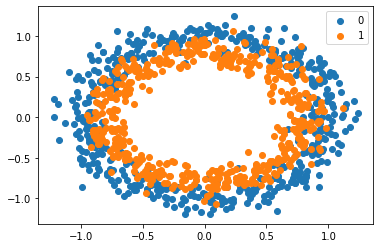

In [2]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
    
pyplot.legend()
pyplot.show()

Running the example creates a scatter plot showing the concentric circles shape of the observations in each class. We can see the noise in the dispersal of the points making the circles less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address.

### Multilayer Perceptron Model

We can develop a Multilayer Perceptron model, or MLP, as a baseline for this problem. First, we will split the 1,000 generated samples into a train and test dataset, with 500 examples in each. This will provide a sufficiently large sample for the model to learn from and an equally sized (fair) evaluation of its performance.

In [3]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

We will define a simple MLP model. The network must have two inputs in the visible layer for the two variables in the dataset. The model will have a single hidden layer with 50 nodes, chosen arbitrarily, and use the rectified linear activation function and the He random weight initialization method. The output layer will be a single node with the sigmoid activation function, capable of predicting a 0 for the outer circle and a 1 for the inner circle of the problem. The model will be trained using stochastic gradient descent with a modest learning rate of 0.01 and a large momentum of 0.9, and the optimization will be directed using the binary cross-entropy loss function.

In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

Once defined, the model can be fit on the training dataset. We will use the holdout test dataset as a validation dataset and evaluate its performance at the end of each training epoch. The model will be fit for 100 epochs, chosen after a little trial and error.

In [5]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

At the end of the run, the model is evaluated on the train, and test dataset and the accuracy is reported.

In [6]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.838, Test: 0.852


Finally, line plots are created showing model accuracy on the train and test sets at the end of each training epoch, providing learning curves. This plot of learning curves is useful as it gives how quickly and how well the model has learned the problem.

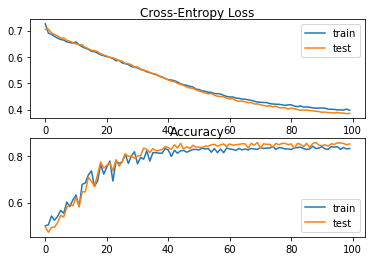

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

Tying these elements together, the complete example is listed below.

In [9]:
# mlp for the two circles problem
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.840, Test: 0.854


Running the example fits the model and evaluates it on the train and test sets.

**Note**: Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that the model achieved an accuracy of about 84% on the test dataset and achieved comparable performance on both the train and test sets, given the same size and similar composition of both datasets.

A graph is created showing line plots of the classification accuracy on the train (blue) and test (orange) datasets. The plot shows a comparable performance of the model on both datasets during the training process. We can see that performance leaps up over the first 30-to-40 epochs to above 80% accuracy then is slowly refined.

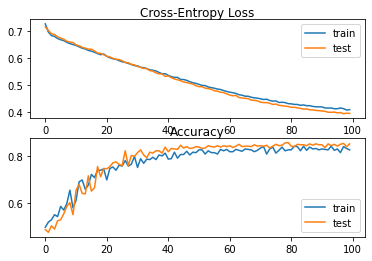

In [11]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

This result, and specifically the dynamics of the model during training, provide a baseline that can be compared to the same model with batch normalization.

### MLP With Batch Normalization

The model introduced in the previous section can be updated to add batch normalization. The expectation is that the addition of batch normalization would accelerate the training process, offering similar or better classification accuracy of the model in fewer training epochs. Batch normalization is also reported as providing a modest form of regularization, meaning that it may also offer a small reduction in generalization error demonstrated by a small increase in classification accuracy on the holdout test dataset. A new BatchNormalization layer can be added to the model after the hidden layer before the output layer. Specifically, after the activation function of the prior hidden layer.

In [13]:
from tensorflow.keras.layers import BatchNormalization

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

The complete example with this modification is listed below.

In [14]:
# mlp for the two circles problem with batchnorm after activation function
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.834, Test: 0.848


Running the example first prints the classification accuracy of the model on the train and test dataset.

**Note**: Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see comparable performance of the model on both the train and test set of about 84% accuracy, very similar to what we saw in the previous section, if not a little better.

A graph of the learning curves is also created showing classification accuracy on both the train and test sets for each training epoch. In this case, we can see that the model has learned the problem faster than the model in the previous section without batch normalization. Specifically, we can see that classification accuracy on the train and test datasets leap above 80% within the first 20 epochs instead of 30-to-40 epochs in the model without batch normalization. The plot also shows the effect of batch normalization during training. We can see lower performance on the training dataset than the test dataset: scores on the training dataset are lower than the performance on the test dataset at the end of the training run. This is likely the effect of the input collected and updated each minibatch.

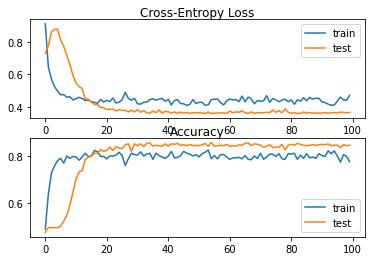

In [15]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can also try a variation of the model where batch normalization is applied prior to the activation function of the hidden layer instead of after the activation function.

In [17]:
from tensorflow.keras.layers import Activation

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

The complete code listing with this change to the model is listed below.

Running the example first prints the classification accuracy of the model on the train and test dataset.

**Note**: Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see comparable model performance on the train and test datasets but slightly worse than the model without batch normalization.

Train: 0.804, Test: 0.828


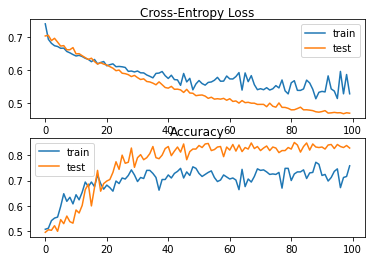

In [19]:
# mlp for the two circles problem with batchnorm after activation function
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(50, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

The line plot of the learning curves on the train and test sets also tells a different story. The plot shows the model learning perhaps at the same pace as the model without batch normalization, but the model's performance on the training dataset is much worse, hovering around 70% to 75% accuracy, again likely an effect of the statistics collected used over each minibatch. At least for this model configuration on this specific dataset, it appears that batch normalization is more effective after the rectified linear activation function.

**Extensions**

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Without Beta and Gamma**. Update the example to not use the beta and gamma parameters in the batch normalization layer and compare results.
* **Without Momentum**. Update the example not to use momentum in the batch normalization layer during training and compare results.
* **Input Layer**. Update the example to use batch normalization after the input to the model and compare results.

**Summary**

In this tutorial, you discovered the batch normalization method used to accelerate the training of deep learning neural networks. Specifically, you learned:

* Deep neural networks are challenging to train, not least because the input from prior layers can change after weight updates.
* Batch normalization is a technique to standardize the inputs to a network, applied to either the activations of a prior layer or inputs directly.
* Batch normalization accelerates training, in some cases by halving the number of epochs  (or better), and provides some regularization effect, reducing generalization error.